In [1]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os

logger = ExperimentLogger('results/kerneltuner-kernel', True)


Failed to update token costs. Using static costs.
/home/neocortex/.cache/pypoetry/virtualenvs/iohblade-xXF9vABH-py3.10/lib/python3.10/site-packages/tokencost/constants.py:69: RuntimeWarning: coroutine 'update_token_costs' was never awaited
  logger.error("Failed to update token costs. Using static costs.")


In [2]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA']
['kerneltuner-gemm', 'kerneltuner-convolution', 'kerneltuner-dedispersion', 'kerneltuner-hotspot']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


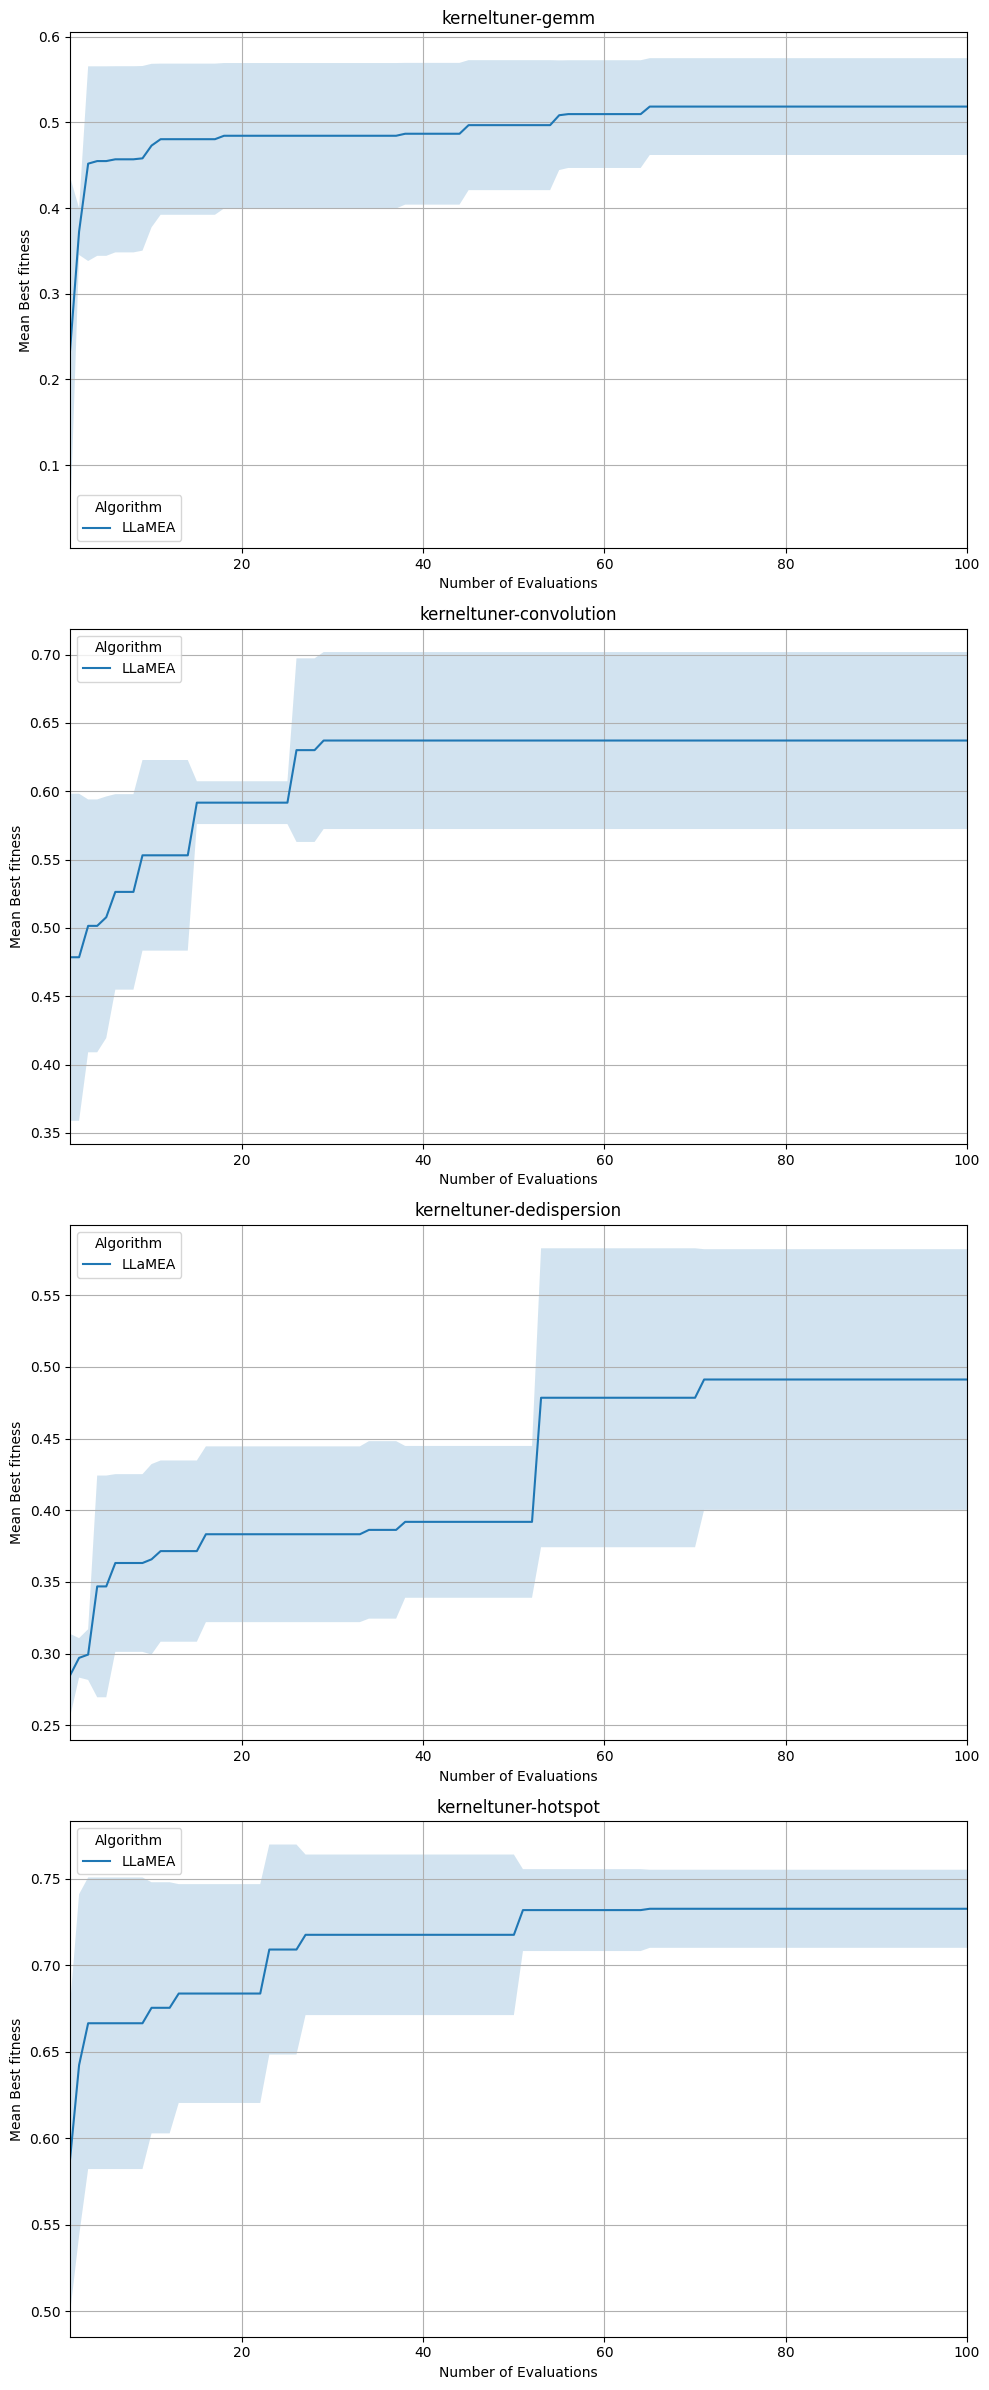

kerneltuner-gemm 402
kerneltuner-convolution 225
kerneltuner-dedispersion 452
kerneltuner-hotspot 552


In [ ]:
import numpy as np
import json



plot_convergence(logger, metric="fitness", save=False, budget=200)

for problem in problems:
    data = logger.get_problem_data(problem_name=problem)
    idx = data['fitness'].idxmax()
    print(problem, idx)
    with open(f'alg-{problem}.py', 'w', encoding='utf-8') as f:
        f.write(data.iloc[idx]['code'])

